Chargez le jeu de données Reuters à l’aide de tf.keras.datasets.reuters.

In [1]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


Prétraitez les données en veillant à convertir les textes en séquences de tokens numériques compatibles avec le modèle. Utilisez des techniques comme la tokenisation et le padding pour obtenir des séquences de longueur uniforme.

In [2]:
# Load Reuters Dataset
(num_words, max_length) = (10000, 100)  # Adjust num_words and max_length as needed
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=num_words)

word_index = reuters.get_word_index()
# Decode a sample review
reverse_word_index = {value: key for key, value in word_index.items()}
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in X_train[0]])


# Padding Sequences
X_train_padded = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test, maxlen=max_length, padding='post')

# Print shapes of the datasets
print(f'Training data shape: {X_train_padded.shape}')
print(f'Testing data shape: {X_test_padded.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Testing labels shape: {y_test.shape}')

# Split training data into training and validation sets
X_train_padded, X_val_padded, y_train, y_val = train_test_split(X_train_padded, y_train, test_size=0.2, random_state=42)

# Print shapes of the datasets
print(f'Training data shape: {X_train_padded.shape}')
print(f'Validation data shape: {X_val_padded.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Validation labels shape: {y_val.shape}')

Training data shape: (8982, 100)
Testing data shape: (2246, 100)
Training labels shape: (8982,)
Testing labels shape: (2246,)
Training data shape: (7185, 100)
Validation data shape: (1797, 100)
Training labels shape: (7185,)
Validation labels shape: (1797,)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, InputLayer
from tensorflow.keras.callbacks import TensorBoard
import datetime

# Définir les paramètres du modèle
embedding_dim = 128

# Créer le modèle
model = Sequential()
model.add(InputLayer(shape=(100,)))
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_length))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(46, activation='softmax'))  # 46 classes dans le jeu de données Reuters

# Compiler le modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Afficher le résumé du modèle
model.summary()

# Define a log directory
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


# Entraîner le modèle
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_val_padded, y_val),callbacks=[tensorboard_callback])

c:\Users\pltel\Documents\IA-DeepLearning\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,924,462 (11.16 MB)

 Trainable params: 2,924,462 (11.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.4823 - loss: 2.1243 - val_accuracy: 0.6722 - val_loss: 1.3703
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.8098 - loss: 0.8138 - val_accuracy: 0.7123 - val_loss: 1.2440
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9600 - loss: 0.2233 - val_accuracy: 0.7173 - val_loss: 1.2559
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9692 - loss: 0.1438 - val_accuracy: 0.7134 - val_loss: 1.2821
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 527s 2s/step - accuracy: 0.9678 - loss: 0.1198 - val_accuracy: 0.7151 - val_loss: 1.2998


Modifiez les hyperparamètres du modèle (par exemple, nombre de neurones, nombre de couches, taux d’apprentissage, nombre d’époques) et observez leur impact sur les performances du modèle.

In [9]:
import tensorflow as tf
from sklearn.model_selection import ParameterGrid
import datetime
import pandas as pd

# Définir les paramètres du modèle
num_words = 10000  # Exemple de valeur, ajustez selon vos besoins
max_length = 100  # Exemple de valeur, ajustez selon vos besoins

# Fonction pour créer le modèle avec des hyperparamètres modifiables
def create_model(embedding_dim, num_neurons, num_layers, learning_rate):
    model = Sequential()
    model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_length))
    for _ in range(num_layers):
        model.add(Dense(num_neurons, activation='relu'))
    model.add(Flatten())
    model.add(Dense(46, activation='softmax'))  # 46 classes dans le jeu de données Reuters

    # Compiler le modèle avec un taux d'apprentissage modifiable
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Définir les hyperparamètres à tester
param_grid = {
    'embedding_dim': [64, 128],
    'num_neurons': [64, 128],
    'num_layers': [1, 2],
    'learning_rate': [0.001, 0.01],
    'epochs': [5,]
}

# Créer une grille de paramètres
grid = ParameterGrid(param_grid)

# Liste pour stocker les résultats
results = []

# Boucle sur chaque combinaison d'hyperparamètres
for params in grid:
    print(f"Testing with parameters: {params}")
    
    # Créer le modèle avec les hyperparamètres actuels
    model = create_model(params['embedding_dim'], params['num_neurons'], params['num_layers'], params['learning_rate'])
    
    # Définir un répertoire de logs pour TensorBoard
    log_dir = f"logs/fit/emb{params['embedding_dim']}_neurons{params['num_neurons']}_layers{params['num_layers']}_lr{params['learning_rate']}_epochs{params['epochs']}_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
    # log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
    
    # Entraîner le modèle avec le callback TensorBoard
    history = model.fit(X_train_padded, y_train, epochs=params['epochs'], batch_size=32, validation_data=(X_val_padded, y_val), callbacks=[tensorboard_callback])
    
    # Évaluer le modèle sur les données de validation
    val_loss, val_accuracy = model.evaluate(X_val_padded, y_val, verbose=0)
    
    # Stocker les résultats
    results.append({
        'embedding_dim': params['embedding_dim'],
        'num_neurons': params['num_neurons'],
        'num_layers': params['num_layers'],
        'learning_rate': params['learning_rate'],
        'epochs': params['epochs'],
        'val_loss': val_loss,
        'val_accuracy': val_accuracy
    })

# Convertir les résultats en DataFrame pandas pour une analyse plus facile
results_df = pd.DataFrame(results)

# Afficher les résultats
print(results_df)

# Trouver la meilleure combinaison d'hyperparamètres
best_params = results_df.loc[results_df['val_accuracy'].idxmax()]
print(f"Best parameters: {best_params}")


Testing with parameters: {'embedding_dim': 64, 'epochs': 5, 'learning_rate': 0.001, 'num_layers': 1, 'num_neurons': 64}
Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.4185 - loss: 2.3079 - val_accuracy: 0.5927 - val_loss: 1.6473
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6588 - loss: 1.3696 - val_accuracy: 0.6728 - val_loss: 1.3914
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8586 - loss: 0.5935 - val_accuracy: 0.6817 - val_loss: 1.4712
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9585 - loss: 0.1965 - val_accuracy: 0.6850 - val_loss: 1.5748
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9624 - loss: 0.1498 - val_accuracy: 0.6861 - val_loss: 1.6430
Testing with parameters: {'embedding_dim': 64, 'epochs': 5, 'learning_rate': 0.001, 'num_layers': 1, 'num_neurons': 128}
Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4276 - loss: 2.2370 - val_accuracy: 0.6227 - val_loss

Best parameters:
- embedding_dim    128.000000
- num_neurons      128.000000
- num_layers         1.000000
- learning_rate      0.001000
- epochs             5.000000
- val_loss           1.512540
- val_accuracy       0.702282

Entraînement et évaluation du modèle :

Entraînez votre modèle en utilisant les données de Reuters et évaluez sa performance en termes de précision, rappel et score F1.
Conseils : Utilisez la fonction classification_report de sklearn.metrics pour obtenir un rapport de classification détaillé et history de Keras pour visualiser la précision et la perte au cours de l’entraînement.

c:\Users\pltel\Documents\IA-DeepLearning\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_24 (Embedding)        │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 100, 128)       │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_24 (Flatten)            │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 46)             │       588,846 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,885,358 (7.19 MB)

 Trainable params: 1,885,358 (7.19 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.4356 - loss: 2.2070 - val_accuracy: 0.6210 - val_loss: 1.5375
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.7107 - loss: 1.1489 - val_accuracy: 0.7006 - val_loss: 1.3360
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9408 - loss: 0.3037 - val_accuracy: 0.6912 - val_loss: 1.4825
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9578 - loss: 0.1949 - val_accuracy: 0.6834 - val_loss: 1.5330
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9702 - loss: 0.1299 - val_accuracy: 0.6956 - val_loss: 1.4944
Test Loss: 1.6010810136795044
Test Accuracy: 0.6745324730873108
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.29      0.17      0.21        12
           1       0.45      0.80      0.57       105
           2       0.00      0.00      0.00        20
           3       0.82      0.93      0

c:\Users\pltel\Documents\IA-DeepLearning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pltel\Documents\IA-DeepLearning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pltel\Documents\IA-DeepLearning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

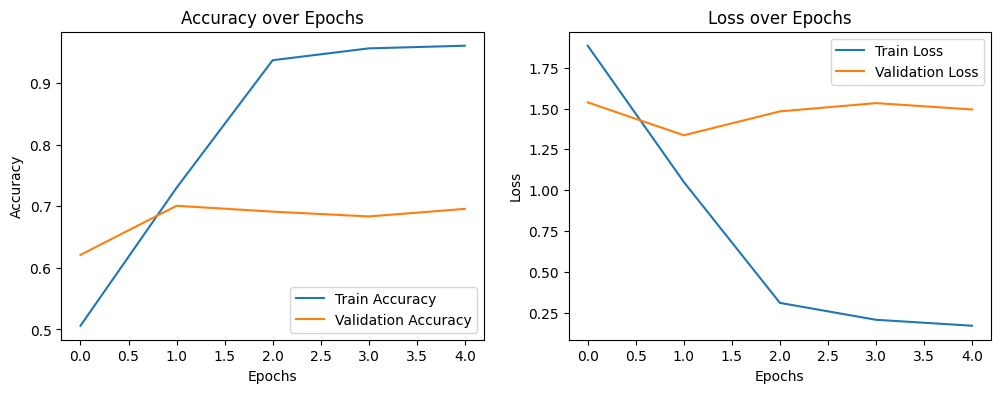

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten
from tensorflow.keras.callbacks import TensorBoard
import datetime
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Définir les paramètres du modèle
num_words = 10000  # Exemple de valeur, ajustez selon vos besoins
max_length = 100  # Exemple de valeur, ajustez selon vos besoins

# Définir les hyperparamètres
embedding_dim = 128
num_neurons = 128
num_layers = 1
learning_rate = 0.001
epochs = 5

# Fonction pour créer le modèle avec des hyperparamètres modifiables
model = Sequential()
model.add(InputLayer(shape=(100,)))
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_length))
for _ in range(num_layers):
    model.add(Dense(num_neurons, activation='relu'))
model.add(Flatten())
model.add(Dense(46, activation='softmax'))  # 46 classes dans le jeu de données Reuters

# Compiler le modèle avec un taux d'apprentissage modifiable
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Afficher le résumé du modèle
model.summary()

# Définir un répertoire de logs pour TensorBoard avec des noms significatifs
log_dir = f"logs/fit/emb{embedding_dim}_neurons{num_neurons}_layers{num_layers}_lr{learning_rate}_epochs{epochs}_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Entraîner le modèle avec le callback TensorBoard
history = model.fit(X_train_padded, y_train, epochs=epochs, batch_size=32, validation_data=(X_val_padded, y_val), callbacks=[tensorboard_callback])

# Évaluer le modèle sur les données de test
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Prédictions sur les données de test
y_pred = model.predict(X_test_padded)
y_pred_classes = y_pred.argmax(axis=-1)

# Rapport de classification
print(classification_report(y_test, y_pred_classes))

# Visualiser l'historique de l'entraînement
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()
